In [1]:
#import dependencies 
!pip install yfinance
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#read in our files
apple = yf.download('AAPL', start='2017-01-01', end='2023-12-31')
samsung = yf.download('005930.KS', start='2017-01-01', end='2023-12-31')

# Reset the index to use the date as a column for merging
apple.reset_index(inplace=True)
samsung.reset_index(inplace=True)

# QUESTION #2 (Did the trading volume of Apple and Samsung increase or decrease during the pandemic?)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921551,115127600
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891417,84472400
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028170,88774400
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329485,127007600
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579807,134247600


In [3]:
samsung.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,35980.0,36240.0,35880.0,36100.0,29680.417969,4650600
1,2017-01-03,36280.0,36620.0,36020.0,36480.0,29992.839844,7357650
2,2017-01-04,36500.0,36520.0,36100.0,36160.0,29729.748047,7971750
3,2017-01-05,36060.0,36060.0,35540.0,35560.0,29236.437500,10967450
4,2017-01-06,36180.0,36440.0,36040.0,36200.0,29762.636719,8880950


In [4]:
merged_df = pd.merge(apple, samsung, on="Date", suffixes=('_AAPL', '_SAMSUNG'))
merged_df

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_SAMSUNG,High_SAMSUNG,Low_SAMSUNG,Close_SAMSUNG,Adj Close_SAMSUNG,Volume_SAMSUNG
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921551,115127600,36280.0,36620.0,36020.0,36480.0,29992.839844,7357650
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891417,84472400,36500.0,36520.0,36100.0,36160.0,29729.748047,7971750
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028170,88774400,36060.0,36060.0,35540.0,35560.0,29236.437500,10967450
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329485,127007600,36180.0,36440.0,36040.0,36200.0,29762.636719,8880950
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579807,134247600,36600.0,37500.0,36560.0,37220.0,30601.255859,13194900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,2023-12-21,196.100006,197.080002,193.500000,194.679993,193.944031,46482500,74600.0,75000.0,74300.0,75000.0,73978.890625,13478766
1657,2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868134,37122800,75800.0,76300.0,75400.0,75900.0,74866.640625,14515608
1658,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,76100.0,76700.0,75700.0,76600.0,75557.109375,13164909
1659,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700,76700.0,78000.0,76500.0,78000.0,77302.359375,20651042


In [5]:
print(merged_df.columns)

Index(['Date', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Close_AAPL',
       'Adj Close_AAPL', 'Volume_AAPL', 'Open_SAMSUNG', 'High_SAMSUNG',
       'Low_SAMSUNG', 'Close_SAMSUNG', 'Adj Close_SAMSUNG', 'Volume_SAMSUNG'],
      dtype='object')


In [6]:
# convert our "Date" column into a datetime format.
merged_df["Date"] = pd.to_datetime(merged_df["Date"], format="%m/%d/%y", errors='coerce')

#set our specific dates 
start_date = "1-1-2020"
end_date = "12-31-2021"

#Filter our data showing the pandemic period

pandemic_data_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]
pandemic_data_df
#pandemic_data_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_SAMSUNG,High_SAMSUNG,Low_SAMSUNG,Close_SAMSUNG,Adj Close_SAMSUNG,Volume_SAMSUNG
708,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876129,135480400,55500.0,56000.0,55000.0,55200.0,49099.429688,12993228
709,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167603,146322800,56000.0,56600.0,54900.0,55500.0,49366.269531,15422255
710,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742668,118387200,54900.0,55600.0,54600.0,55500.0,49366.269531,10278951
711,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000,55700.0,56400.0,55600.0,55800.0,49633.109375,10009778
712,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565208,132079200,56200.0,57400.0,55900.0,56800.0,50522.589844,23501171
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2021-12-23,175.850006,176.850006,175.270004,176.279999,173.629776,68356600,79800.0,80000.0,79300.0,79900.0,75358.914062,13577498
1185,2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618881,74919600,80600.0,80600.0,79800.0,80200.0,75641.867188,10783368
1186,2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594513,79144300,80200.0,80400.0,79700.0,80300.0,75736.171875,18226325
1187,2021-12-29,179.330002,180.630005,178.139999,179.380005,176.683151,62348900,80200.0,80200.0,78500.0,78800.0,74657.062500,19794795


In [7]:
# We want to firgure out our trading volume

# Reset the index and drop the old index column
pandemic_data_df = pandemic_data_df.reset_index(drop=True)

#assign our ticker values
ticker = ["KRW"] * (len(pandemic_data_df) // 2) + ["USD"] * (len(pandemic_data_df) - (len(pandemic_data_df) // 2))

# use .loc indexer to assign the new Ticker values.
pandemic_data_df.loc[:, "ticker"] = ticker
 
# Group our data
volume_data_df = pandemic_data_df.groupby("ticker")[["Volume_AAPL", "Volume_SAMSUNG"]].sum().reset_index()

(volume_data_df)


,ticker,Volume_AAPL,Volume_SAMSUNG
0,KRW,38033646800,5260876748
1,USD,21885462600,4538987777


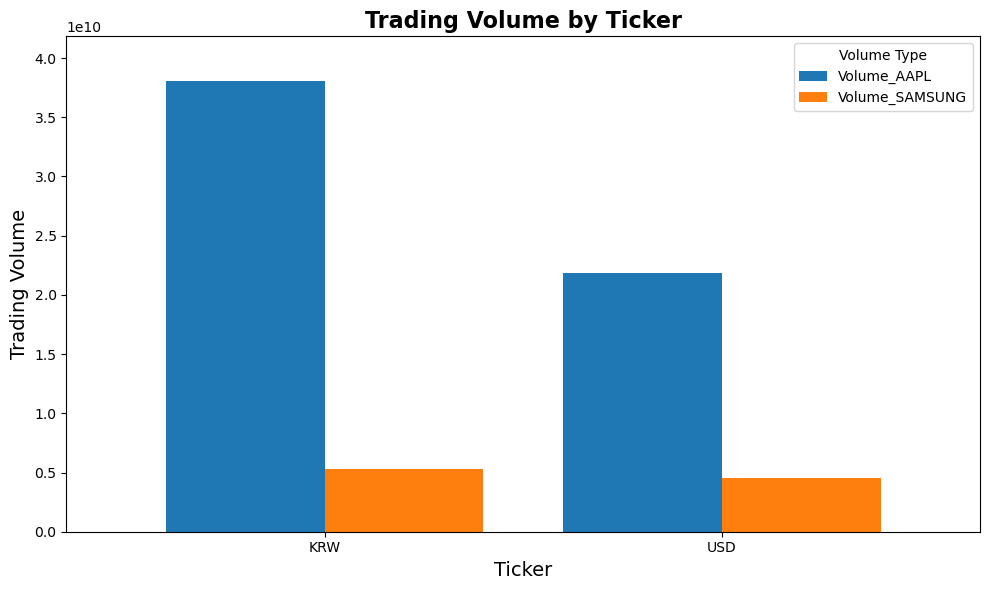

In [8]:
# Data Visualization

# set my index to the ticker
volume_data_df.set_index('ticker', inplace=True)

#plot our data 
volume_data_df[['Volume_AAPL', 'Volume_SAMSUNG']].plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], width=0.8)

# Title and labels
plt.title('Trading Volume by Ticker', fontsize=16, fontweight='bold')
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Trading Volume', fontsize=14)
plt.legend(title='Volume Type')

 
#include x-ticks
plt.xticks(rotation=0)


plt.ylim(0, volume_data_df[['Volume_AAPL', 'Volume_SAMSUNG']].max().max() * 1.1)

plt.tight_layout()
plt.show()



In [ ]:
print(volume_data_df.head())